<a href="https://colab.research.google.com/github/KinzaAslam/DSA_20SW071/blob/main/Lab_08_A_B_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [ ]:
# read data
df = pd.read_csv('ab_data.csv')

In [ ]:
# check rows with shape method
df.shape

(38833, 5)

In [ ]:
# info helps to get an overview as well
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38833 entries, 0 to 38832
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       38833 non-null  int64  
 1   timestamp     38833 non-null  object 
 2   group         38833 non-null  object 
 3   landing_page  38832 non-null  object 
 4   converted     38832 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.5+ MB


In [ ]:
# use unique method
users_unique = df.user_id.nunique()
users_unique

38757

In [ ]:
# proportions of user who converted (i.e. converted = 1)
df[df.converted == 1].user_id.count()/df.shape[0]

# alternatively
df.converted.mean()

0.1215492377420684

In [ ]:
# there are two dimentions to this
# 1. get the number where landing_page equals new_page but group is not treatment
# 2. get the number where landing_page not new_page but group is treatment
# adding these two will give total misalignment
df[(df.landing_page == 'new_page') & (df.group != 'treatment')].user_id.count() + df[(df.landing_page != 'new_page') & (df.group == 'treatment')].user_id.count()

544

In [ ]:
# we find the rows with missing values with isnull
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    1
converted       1
dtype: int64

In [ ]:
# using the same logic from e.
df2 = df.drop(df[((df.landing_page == 'new_page') & (df.group != 'treatment')) | ((df.landing_page != 'new_page') & (df.group == 'treatment'))].index)

In [ ]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [ ]:
# check for info
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38289 entries, 0 to 38831
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       38289 non-null  int64  
 1   timestamp     38289 non-null  object 
 2   group         38289 non-null  object 
 3   landing_page  38289 non-null  object 
 4   converted     38289 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.8+ MB


In [ ]:
df2.user_id.nunique()

38288

In [ ]:
# here we look for duplicated user_id, but we show both of those in our result by keep=False
df2.user_id[df2.user_id.duplicated(keep=False)]

1899    773192
2893    773192
Name: user_id, dtype: int64

In [ ]:
# at what index duplicated user_id is
df2[df2.user_id.duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0.0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0.0


In [ ]:
# we can remove duplicates in multiple ways
# removing by index, removing by first or last entry as well as by unique column timestamp
df2 = df2[df2.timestamp != '2017-01-09 05:37:58.781806']

In [ ]:
# quick sanity check
df2.user_id.nunique()

38288

In [ ]:
df2.converted.mean()

# alternatively
df2.describe().loc['mean'].converted

0.12155244463017133

In [ ]:
# logic: query the converted column where group column value is control and take mean
df2.converted[df2.group == 'control'].mean()

0.1229430877266534

In [ ]:
# same logic as above, here we do it for treatment instead of control
df2.converted[df2.group == 'treatment'].mean()

0.1201707799645944

In [ ]:
df2[df2.landing_page == 'new_page'].count()/df2.shape[0]

user_id         0.501619
timestamp       0.501619
group           0.501619
landing_page    0.501619
converted       0.501619
dtype: float64

In [ ]:
# convert rate is how many users converted (i.e. converted = 1)
p_new = df2.converted.mean()
p_new

0.12155244463017133

In [ ]:
p_old = df2.converted.mean() # the same!!!
p_old

0.12155244463017133

In [ ]:
# number of users who got the new page (i.e. group = treatment)
n_new = df2[df2.group == 'treatment'].count()[0]
n_new

19206

In [ ]:
# number of users who reamined with old page (i.e. group = control)
n_old = df2[df2.group == 'control'].count()[0]
n_old

19082

In [ ]:
# simulating n_new transaction that have probabiliy of receiving new page, using binomial gives the outout as the number of 1's
new_page_converted = np.random.binomial(1,p_new,n_new)
new_page_converted.mean()

0.12339893783192753

In [ ]:
# alternatively
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
new_converted_simulation.mean()

0.12157357596584402

In [ ]:
# simulating n_new transaction that have probabiliy of having old page, using binomial gives the outout as the number of 1's
old_page_converted = np.random.binomial(1,p_old,n_old)
old_page_converted.mean()

0.12771197987632324

In [ ]:
# alternatively
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
old_converted_simulation.mean()

0.12151607797924746

In [ ]:
# probabilty of new and old page based upon simulated values in e. and f.
p_new = new_page_converted.mean()
p_old = old_page_converted.mean()
p_new - p_old

-0.004313042044395712

In [ ]:
# alternatively
new_converted_simulation.mean() - old_converted_simulation.mean()

5.7497986596558026e-05

In [ ]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(1,p_new,n_new)  # bootstrapping
    old_page_converted = np.random.binomial(1,p_old,n_old) # bootstrapping
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

In [ ]:
# alternatively
p_diffs_alt = new_converted_simulation - old_converted_simulation

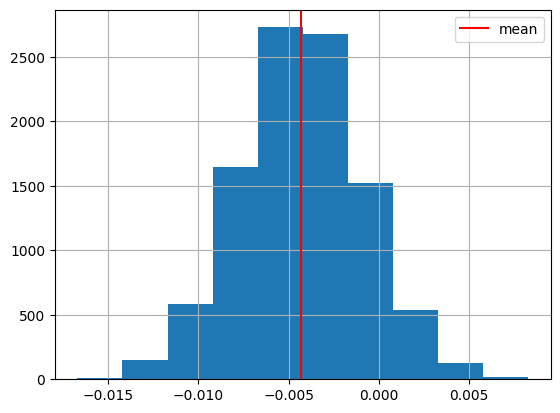

In [ ]:
# convert p_diffs to numpy array for array based computations in the future
p_diffs = np.array(p_diffs)

# histogram
plt.hist(p_diffs)
plt.grid()
plt.axvline(p_diffs.mean(), color='r', label='mean')
plt.legend();

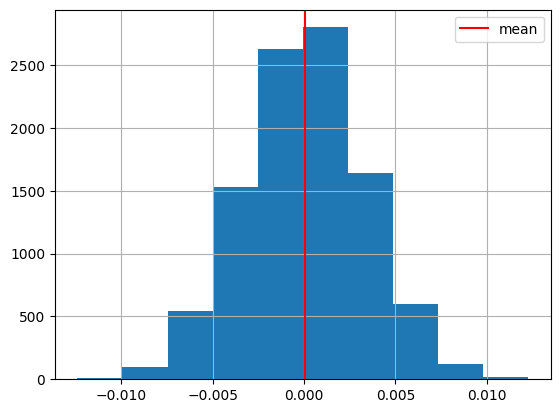

In [ ]:
# alternatively
# histogram
plt.hist(p_diffs_alt)
plt.grid()
plt.axvline(p_diffs_alt.mean(), color='r', label='mean')
plt.legend();

In [ ]:
actual_diff = df2.converted[df2.group == 'treatment'].mean() - df2.converted[df2.group == 'control'].mean()
(actual_diff < p_diffs).mean()

0.3197

In [ ]:
# alternatively
actual_diff = df2.converted[df2.group == 'treatment'].mean() - df2.converted[df2.group == 'control'].mean()
(actual_diff < p_diffs_alt).mean()

0.8024

In [ ]:
# quick check before diving in
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0.0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0.0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0.0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0.0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1.0


In [ ]:
import statsmodels.api as sm

convert_old = df2[df2.group == 'control'].converted.sum()
convert_new = df2[df2.group == 'treatment'].converted.sum()
n_old = df2[df2.group == 'control'].converted.count()
n_new = df2[df2.group == 'treatment'].converted.count()

In [ ]:
# based upon the documentation
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value

(0.8300432843872828, 0.7967428442095742)

In [ ]:
# quick consistency check
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0.0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0.0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0.0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0.0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1.0


In [ ]:
# copy the dataframe to a new one, for clarity
df2_copy = df2.copy()

In [ ]:
# another sanity check, if True, go ahead
df2_copy.shape == df2.shape

True

In [ ]:
# add an intercept
df2_copy['intercept'] = 1

# using pd.get_dummies to convert the 'landing_page' and 'group' to 1s and 0s
df2_copy[['landing_page_new', 'landing_page_old']] = pd.get_dummies(df2_copy['landing_page'])
df2_copy[['ab_page_control','ab_page_treatment']] = pd.get_dummies(df2_copy['group'])

In [ ]:
# here, we will use landing_page_old and ab_page_control as our baselines, therefore remove those
df2_copy.drop(['landing_page_old','ab_page_control'], axis=1, inplace=True)

In [ ]:
df2_copy.head()

,user_id,timestamp,group,landing_page,converted,intercept,landing_page_new,ab_page_treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0.0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0.0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0.0,1,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0.0,1,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1.0,1,0,0


In [ ]:
logit_mod = sm.Logit(df2_copy['converted'], df2_copy[['intercept', 'ab_page_treatment']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.369998
         Iterations 6


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:                38288
Model:                          Logit   Df Residuals:                    38286
Method:                           MLE   Df Model:                            1
Date:                Sat, 21 Oct 2023   Pseudo R-squ.:               2.432e-05
Time:                        15:06:46   Log-Likelihood:                -14166.
converged:                       True   LL-Null:                       -14167.
Covariance Type:            nonrobust   LLR p-value:                    0.4065
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept            -1.9649      0.022    -89.127      0.000      -2.008      -1.922
ab_page_treatment    -0.0260      0.031     -0.830      0.407      -0.087       0.035
=====================================================================================
"""

In [ ]:
# interprete the coefficients
1/np.exp(results.params[1])

1.026303575393263

In [ ]:
# additional: question posed by previous reviewer
# how to get p-value as if it were a one-tailed test
1-0.190/2

0.905

In [ ]:
# duration of the experiment
duration = np.array(pd.to_datetime(df.timestamp).sort_values(ascending=True))
td = duration[-1] - duration[0]
days = td.astype('timedelta64[D]')
days / np.timedelta64(1, 'D')

21.0

In [ ]:
# read file and join the dfs
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [ ]:
# quick check
df_new.head()

,country,timestamp,group,landing_page,converted
user_id,,,,,
668810,UK,2017-01-13 16:59:49.226184,treatment,new_page,0.0
698200,US,2017-01-21 21:50:42.718525,treatment,new_page,0.0
724651,US,2017-01-07 21:32:07.568614,control,old_page,0.0
739948,UK,2017-01-12 10:40:33.349696,treatment,new_page,0.0
709491,US,2017-01-15 12:42:40.374460,treatment,new_page,0.0


In [ ]:
# Create the necessary dummy variables
df_new[['canada','uk','us']] = pd.get_dummies(df_new['country'])

In [ ]:
# let's consider US being our baseline, therefore, we drop US
df_new.drop(['us'], axis=1, inplace=True)

In [ ]:
# fitting linear model
df_new['intercept'] = 1

logit_mod = sm.Logit(df_new['converted'], df_new[['intercept','canada','uk']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.369955
         Iterations 6


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:                38288
Model:                          Logit   Df Residuals:                    38285
Method:                           MLE   Df Model:                            2
Date:                Sat, 21 Oct 2023   Pseudo R-squ.:               0.0001391
Time:                        15:09:13   Log-Likelihood:                -14165.
converged:                       True   LL-Null:                       -14167.
Covariance Type:            nonrobust   LLR p-value:                    0.1393
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9904      0.019   -106.053      0.000      -2.027      -1.954
canada        -0.0612      0.075     -0.816      0.414      -0.208       0.086
uk             0.0608      0.036      1.690      0.091      -0.010       0.131
==============================================================================
"""

In [ ]:
1/np.exp(-0.0408), np.exp(0.0099)

(1.0416437559600236, 1.0099491671175422)